# Funcionesde distribución de probabilidad

## Distribución Uniforme

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
a = 1
b = 100
n = 200
data = np.random.uniform(a, b, n)

(array([22., 20., 13., 28., 14., 16., 31., 21., 17., 18.]),
 array([ 1.55255775, 11.31181219, 21.07106662, 30.83032106, 40.5895755 ,
        50.34882993, 60.10808437, 69.8673388 , 79.62659324, 89.38584768,
        99.14510211]),
 <a list of 10 Patch objects>)

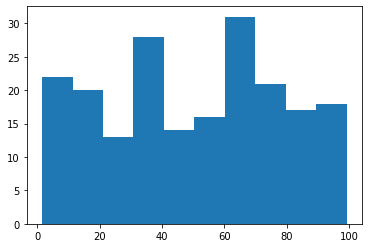

In [41]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [42]:
data = np.random.randn(1000000)

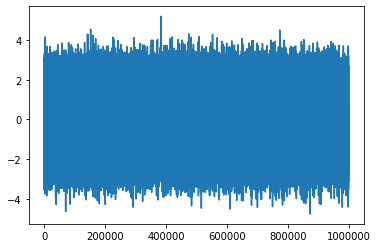

In [43]:
x = range(1,1000001)
plt.plot(x, data)

(array([1.02000e+02, 2.71100e+03, 3.46230e+04, 1.79489e+05, 3.68143e+05,
        3.02156e+05, 9.91140e+04, 1.30450e+04, 6.09000e+02, 8.00000e+00]),
 array([-4.76604668, -3.76954746, -2.77304823, -1.77654901, -0.78004979,
         0.21644943,  1.21294866,  2.20944788,  3.2059471 ,  4.20244632,
         5.19894555]),
 <a list of 10 Patch objects>)

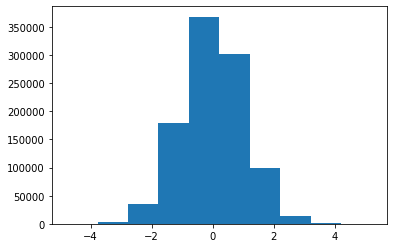

In [44]:
%matplotlib inline
plt.hist(data)

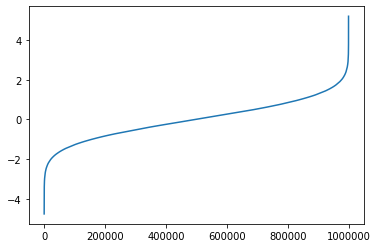

In [45]:
plt.plot(x,sorted(data))

(array([  16.,  104.,  507., 1442., 2612., 2755., 1651.,  710.,  175.,
          28.]),
 array([-3.56928365, -1.79851648, -0.0277493 ,  1.74301787,  3.51378505,
         5.28455222,  7.05531939,  8.82608657, 10.59685374, 12.36762092,
        14.13838809]),
 <a list of 10 Patch objects>)

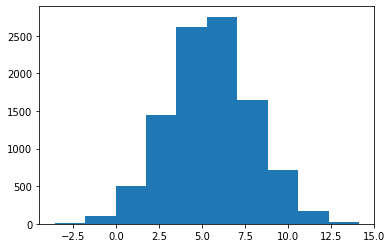

In [46]:
# Generar nuestra propia distribución normal
mu = 5.5
sd = 2.5
data = mu + sd * np.random.randn(10000) # z = (x - mu) / sd -> N(0,1), x = mu + sd * z
plt.hist(data)

In [47]:
data = np.random.randn(2,4)
data

array([[-1.14052828, -0.94925133, -0.82011929,  1.54816167],
       [ 0.61757105,  1.61850134,  0.56472397,  2.48627858]])

## La simulación de Monte-Carlo

* Generamos dos números aleatorios x e y entre 0 y 1
* Calcularemos x * x + y * y
    * Si el valor es inferior a 1 -> estamos dentro del círculo
    * Si el valor es supeior a 1 -> estamos fuera del círculo
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número       total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de PI.
* Repetiremos el experimento un número suficiente de veces (por ejemplo 1000), para obtener (1000)      diferentes aproximaciones de PI.
* Calculamos el promedio de los 1000 experimentos anteriores para dar un valor final a PI. 

In [48]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])    
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
    pi = pi_avg/n_exp

    print(pi)
    return (pi, plt.plot(pi_value_list))

3.141822000000001


(3.141822000000001, [<matplotlib.lines.Line2D at 0x2ed8c8d8b48>])

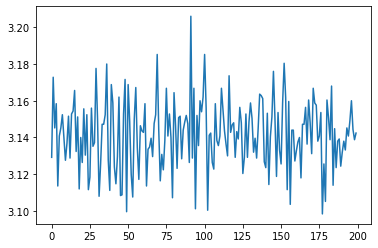

In [49]:
pi_montecarlo(10000,200)

## Dummy Data Sets

In [54]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [56]:
data.head()

,A,B,C
0,0.459402,-0.179924,8.993737
1,0.432205,3.317874,19.616762
2,-1.775045,-2.481288,13.011111
3,-1.881380,4.478374,24.142000
4,-0.621718,3.286841,26.707542


In [57]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000105,1.500627,18.499926
std,1.000304,2.496344,7.799350
min,-4.635824,-9.939073,5.000004
25%,-0.674967,-0.182305,11.743574
50%,-0.002076,1.501585,18.501807
75%,0.675022,3.184989,25.268787
max,4.711265,13.323347,31.999970


(array([9.90000e+01, 2.66400e+03, 3.06480e+04, 1.51461e+05, 3.30768e+05,
        3.18975e+05, 1.36914e+05, 2.61740e+04, 2.22300e+03, 7.40000e+01]),
 array([-4.63582411, -3.70111519, -2.76640628, -1.83169736, -0.89698844,
         0.03772047,  0.97242939,  1.9071383 ,  2.84184722,  3.77655614,
         4.71126505]),
 <a list of 10 Patch objects>)

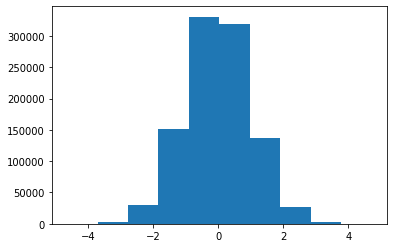

In [58]:
plt.hist(data["A"])

(array([1.45000e+02, 3.15600e+03, 3.40710e+04, 1.58665e+05, 3.34118e+05,
        3.13207e+05, 1.30556e+05, 2.41740e+04, 1.84500e+03, 6.30000e+01]),
 array([-9.93907295, -7.61283094, -5.28658892, -2.96034691, -0.63410489,
         1.69213712,  4.01837914,  6.34462116,  8.67086317, 10.99710519,
        13.3233472 ]),
 <a list of 10 Patch objects>)

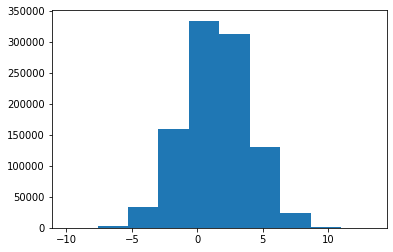

In [59]:
plt.hist(data["B"])

(array([100310.,  99977., 100105.,  99708.,  99837.,  99992.,  99751.,
         99757., 100425., 100138.]),
 array([ 5.00000392,  7.70000055, 10.39999718, 13.09999381, 15.79999044,
        18.49998707, 21.1999837 , 23.89998033, 26.59997695, 29.29997358,
        31.99997021]),
 <a list of 10 Patch objects>)

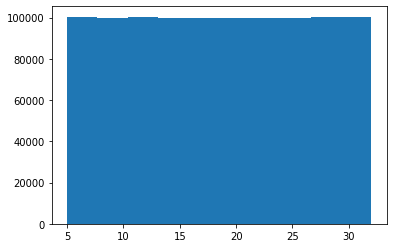

In [60]:
plt.hist(data["C"])

In [66]:
data = pd.read_csv("/Users/nuelcodes/Data-Science-Python/datasets/customer-churn-model/Customer Churn Model.txt")

In [67]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [68]:
colum_names = data.columns.values.tolist()

In [69]:
a = len(colum_names)
a

21

In [75]:
new_data = pd.DataFrame(
    {
        'Column Name' : colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [76]:
new_data

,Column Name,A,B
42,State,2.064734,0.949781
43,Account Length,-1.083645,0.676468
44,Area Code,1.237574,0.307111
45,Phone,-0.021266,0.801347
46,Int'l Plan,0.023434,0.228772
47,VMail Plan,0.822456,0.065225
48,VMail Message,-0.312629,0.778738
49,Day Mins,1.053152,0.060335
50,Day Calls,-1.399244,0.722378
51,Day Charge,-1.971448,0.124607
